In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

import wrangle as w
import explore as e 
import model as m

In [15]:
# # acquiring, cleaning, and adding features to data
df = w.prep_telco()
train, validate, testt = w.split_data(df, "churn")
train

,partner,dependents,paperless_billing,automatic_payment,churn,tenure
5911,0,1,1,1,0,26
2479,1,0,0,0,0,47
5889,0,0,1,0,1,1
6087,0,0,1,1,0,69
785,0,0,0,1,0,51
...,...,...,...,...,...,...
6102,1,0,0,1,1,2
356,0,0,1,0,0,52
1756,0,0,1,0,1,4
2127,0,0,0,0,0,35


In [5]:
# Get information about df, such as column names, rows, datatypes, non-missing values
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   partner            7043 non-null   uint8
 1   dependents         7043 non-null   uint8
 2   paperless_billing  7043 non-null   uint8
 3   automatic_payment  7043 non-null   int64
 4   churn              7043 non-null   uint8
 5   tenure             7043 non-null   int64
dtypes: int64(2), uint8(4)
memory usage: 137.7 KB


In [6]:
# Get summary statistics for numeric columns.
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
paperless_billing,7043.0,0.592219,0.491457,0.0,0.0,1.0,1.0,1.0
automatic_payment,7043.0,0.435326,0.495835,0.0,0.0,0.0,1.0,1.0
churn,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0


In [7]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


In [8]:
# Use .describe with object columns.

obj_cols_2 = df_2.columns[[df_2[col].dtype == 'O' for col in df_2.columns]]
for col in obj_cols_2:
    print(df_2[col].value_counts())
    print(df_2[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


In [9]:
# Find columns with nulls and the total of missing values.
missing = df_2.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

# Clean the Data

In [12]:
def prep_telco(df):
    '''
    The function will clean the telco dataset.
    The function will also return to dataframes:
    '''
    # encoding payment type automatic payment equals 1 and non_automatic equals 0
    df["automatic_payment"] = df["payment_type"].map({"Bank transfer (automatic)": 1, "Credit card (automatic)": 1, "Mailed check": 0, "Electronic check": 0})

    # create dummies
    dummy_df = pd.get_dummies(df[["partner",
                                 "dependents", 
                                 "paperless_billing", 
                                 "churn"]],
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    # rename columns
    df = df[["customer_id","partner_Yes", "dependents_Yes", "paperless_billing_Yes", "automatic_payment", "tenure","churn_Yes"]]
    
    df = df.rename(columns={"partner_Yes": "partner", "dependents_Yes": "dependents", "paperless_billing_Yes": "paperless_billing", "churn_Yes": "churn"})
    # df for modeling
    
    return df


# How often are customers churning?

In [16]:
y = train.churn.value_counts(normalize=True)


In [17]:
def churn_pie():
    y = train.churn.value_counts(normalize=True)

    mylabels = ["Did Not Churn", "Did Churn"]

    plt.pie(y, labels = mylabels, autopct='%1.1f%%')

    plt.show() 

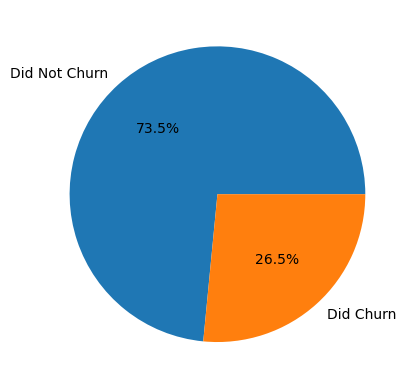

In [18]:
e.churn_pie(train)

# QUESTION 1: Do customers that have an automatic payment type more or less likely to churn?

* What's the relationship between churn and payment type?

In [ ]:
plt.title("What's the Relationship Between Churn and Automatic Payment Type?")
sns.barplot(x="automatic_payment", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

In [ ]:
# Setup a crosstab of observed survival to pclass
def cross_function(train, target_variable, feature_variable, null_hypothesis, alternative_hypothesis):
    '''
    This function will take the train df, target_variable, and feature_variable
    '''
    observed = pd.crosstab(train[target_variable], train[feature_variable])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        print(f"Reject the null hypothesis: {null_hypothesis}")
        print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
    else:
        print("Fail to reject the null")
        print("Insufficient evidence to reject the null")
    return p

Do customers that have an automatic payment type more or less likely to churn?

In [ ]:
alpha_Q1 = 0.05
target_Q1 = "churn"
feature_variable_Q1 = "automatic_payment"
null_hypothesis_Q1 = "churn and automatic payment are independent"
alternative_hypothesis_Q1 = "there is a relationship between automatic payment and churn"

# Question 2:  Do customers that have paperless billing more or less likely to churn?
* What's the relationship between churn and paperless billing?

In [ ]:
plt.title("What's the Relationship Between Churn and paperless billing?")
sns.barplot(x="paperless_billing", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

In [ ]:
# Chi squared to compare proportions, define confidence
alpha_Q2 = 0.05
target_Q2 = "churn"
feature_variable_Q2 = "paperless_billing"
null_hypothesis_Q2 = "churn and paperless_billing are independent"
alternative_hypothesis_Q2 = "there is a relationship between paperless_billing and churn"

e.cross_function(train, target, feature_variable_Q2, null_hypothesis_Q2, alternative_hypothesis_Q2)

# Question 3: Do customers that have partner more or less likely to churn?
* What's the relationship between churn and customers' with partners?

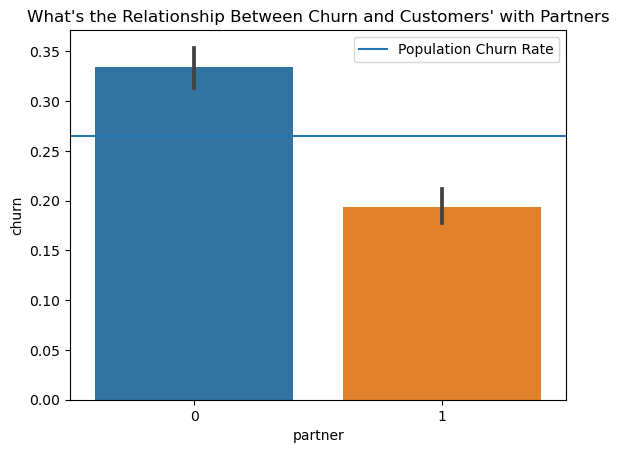

In [19]:
plt.title("What's the Relationship Between Churn and Customers' with Partners")
sns.barplot(x="partner", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

def relationship_churn(train, graph_title, feature, target):
    '''
    This function will take the train, graph_title, feature, and target,
    and it will display a bargraph based on the information provided for the churn dataset 

    '''
    fig, ax =plt.subplots()
    plt.title(graph_title)
    sns.barplot(x=feature, y=target, data=train)
    population_churn_rate = train.churn.mean()

    tick_label = ["No", "Yes"]
    ax.set_xticklabels(tick_label)
    # sns.distplot(train)

    plt.axhline(population_churn_rate, label="Population Churn Rate")
    plt.legend()
    plt.show()

In [ ]:
relationship_churn(train, "What's the Relationship Between Churn and Customers' with Partners", feature_variable_Q2, target)

In [ ]:
# Chi squared to compare proportions, define confidence
alpha_Q3 = 0.05
target_Q3 = "churn"
feature_variable_Q3 = "partner"
null_hypothesis_Q3 = "churn and customers' with partners are independent"
alternative_hypothesis_Q3 = "there is a relationship between customers' with partners and churn"

e.cross_function(train, target, feature_variable_Q3, null_hypothesis_Q3, alternative_hypothesis_Q3)

# Question 4: Do customers that have dependents more or less likely to churn?
* What's the relationship between churn and customers' with dependents?

# Q 6: Does tenure affect whether a customer will churn or not?# Q 6: Does tenure affect whether a customer will churn or not?

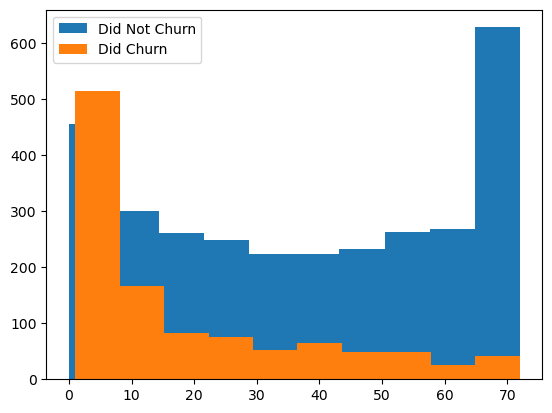

In [96]:
did_churn = train[train.churn == 1]
did_not_churn = train[train.churn == 0]
plt.hist(data=did_not_churn, x='tenure', label="Did Not Churn", color="C0")
plt.hist(data=did_churn, x='tenure', label="Did Churn", color="C1")

plt.legend()

In [64]:
train.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [73]:
churn_sample = train[train.churn == 1].tenure

print(churn_sample.var())
print(no_churn_sample.var())
# var not equal

384.3762122467161
581.1295195495867


<AxesSubplot:>

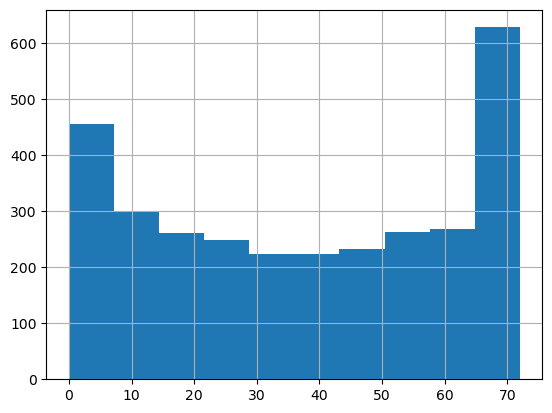

In [68]:
no_churn_sample = train[train.churn == 0].tenure
no_churn_sample

In [ ]:
**I will use Independent T-Test to investigate the relationship between churn and tenure**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'
* $H_a$: 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'

In [91]:
# Chi squared to compare proportions, define confidence
null_hypothesis_Q6 = "'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'"
alternative_hypothesis_Q6 = "Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'"


In [92]:

def tenure_ttest(churn_sample, no_churn_sample, null_hypothesis, alternative_hypothesis):
    t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: {null_hypothesis}")
        print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
    else:
        print("Fail to reject the null")
        print("Insufficient evidence to reject the null")
    print(f"p = {p}")

In [93]:
tenure_ttest(churn_sample, no_churn_sample, null_hypothesis_Q6, alternative_hypothesis_Q6)

Reject the null hypothesis: 'Tenure' of customers who 'Churn' equals that of those who don't 'Churn'
Sufficient evidence to move forward understanding that, Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'
p = 8.804788934587683e-137


**The p-value is greater than the alpha. Therefore, we have evidence to support that 'Tenure' of customers who 'Churn' is not equal to that of those who don't 'Churn'. Based on this, I believe that using the 'Tenue' feature in modeling will likely have a small positive impact on the model's accuracy.**